In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd
sns.set_context('talk')

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
cal_exp = '03_07_24_RandomCircles_UNetLTSSuite'

path_list = [
    f"{root}/calibration/{cal_exp}/Individual_TempScaling",
    f"{root}/calibration/{cal_exp}/Individual_LTS",
]

df_list = []
for path in path_list:
    dfc = rs.load_configs(
        path,
        properties=False,
    )
    df = rs.load_metrics(dfc)
    df_list.append(df)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [3]:
df = pd.concat(df_list)

In [4]:
def calibrator(model):
    return model.split('.')[-1]

df.augment(calibrator)

In [5]:
df.keys()

Index(['phase', 'epoch', 'loss', 'dice_score', 'ece_loss', 'edge_ece_loss',
       'elm_loss', 'data', 'binarize', 'iters_per_epoch', 'preload',
       'return_dst_to_bdry', 'subsplit', 'version', 'batch_size',
       'num_workers', 'pin_memory', 'seed', 'loss_func', 'batch_reduction',
       'from_logits', 'model', '_pretrained_class', 'image_channels',
       'num_classes', 'optim', 'lr', 'weight_decay', 'epochs', 'eval_freq',
       'pretrained_dir', 'pretrained_select_metric', 'path', 'filters',
       'img_channels', 'use_image', 'use_logits', 'calibrator'],
      dtype='object')

In [6]:
df.head()

,phase,epoch,loss,dice_score,ece_loss,edge_ece_loss,elm_loss,data,binarize,iters_per_epoch,...,epochs,eval_freq,pretrained_dir,pretrained_select_metric,path,filters,img_channels,use_image,use_logits,calibrator
0,train,0,0.142338,0.887565,0.017856,0.232196,0.018092,ese.experiment.datasets.Shapes,True,250,...,500,10,/storage/vbutoi/scratch/ESE/training/03_06_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/03_07_...,NaN,NaN,NaN,NaN,Temperature_Scaling
1,val,0,0.224397,0.859511,0.028713,0.225617,0.028848,ese.experiment.datasets.Shapes,True,250,...,500,10,/storage/vbutoi/scratch/ESE/training/03_06_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/03_07_...,NaN,NaN,NaN,NaN,Temperature_Scaling
2,train,1,0.139219,0.889473,0.017493,0.231596,0.017718,ese.experiment.datasets.Shapes,True,250,...,500,10,/storage/vbutoi/scratch/ESE/training/03_06_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/03_07_...,NaN,NaN,NaN,NaN,Temperature_Scaling
3,train,2,0.136723,0.889712,0.017320,0.233008,0.017566,ese.experiment.datasets.Shapes,True,250,...,500,10,/storage/vbutoi/scratch/ESE/training/03_06_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/03_07_...,NaN,NaN,NaN,NaN,Temperature_Scaling
4,train,3,0.136378,0.889563,0.017323,0.230145,0.017581,ese.experiment.datasets.Shapes,True,250,...,500,10,/storage/vbutoi/scratch/ESE/training/03_06_24_...,val-dice_score,/storage/vbutoi/scratch/ESE/calibration/03_07_...,NaN,NaN,NaN,NaN,Temperature_Scaling


In [7]:
def cal_cfg(calibrator, use_image, use_logits, filters):
    if calibrator == "Temperature_Scaling":
        return calibrator
    else:
        return f"{calibrator}_useimage:{use_image}_uselogits:{use_logits}_filters:{filters}"

df.augment(cal_cfg)

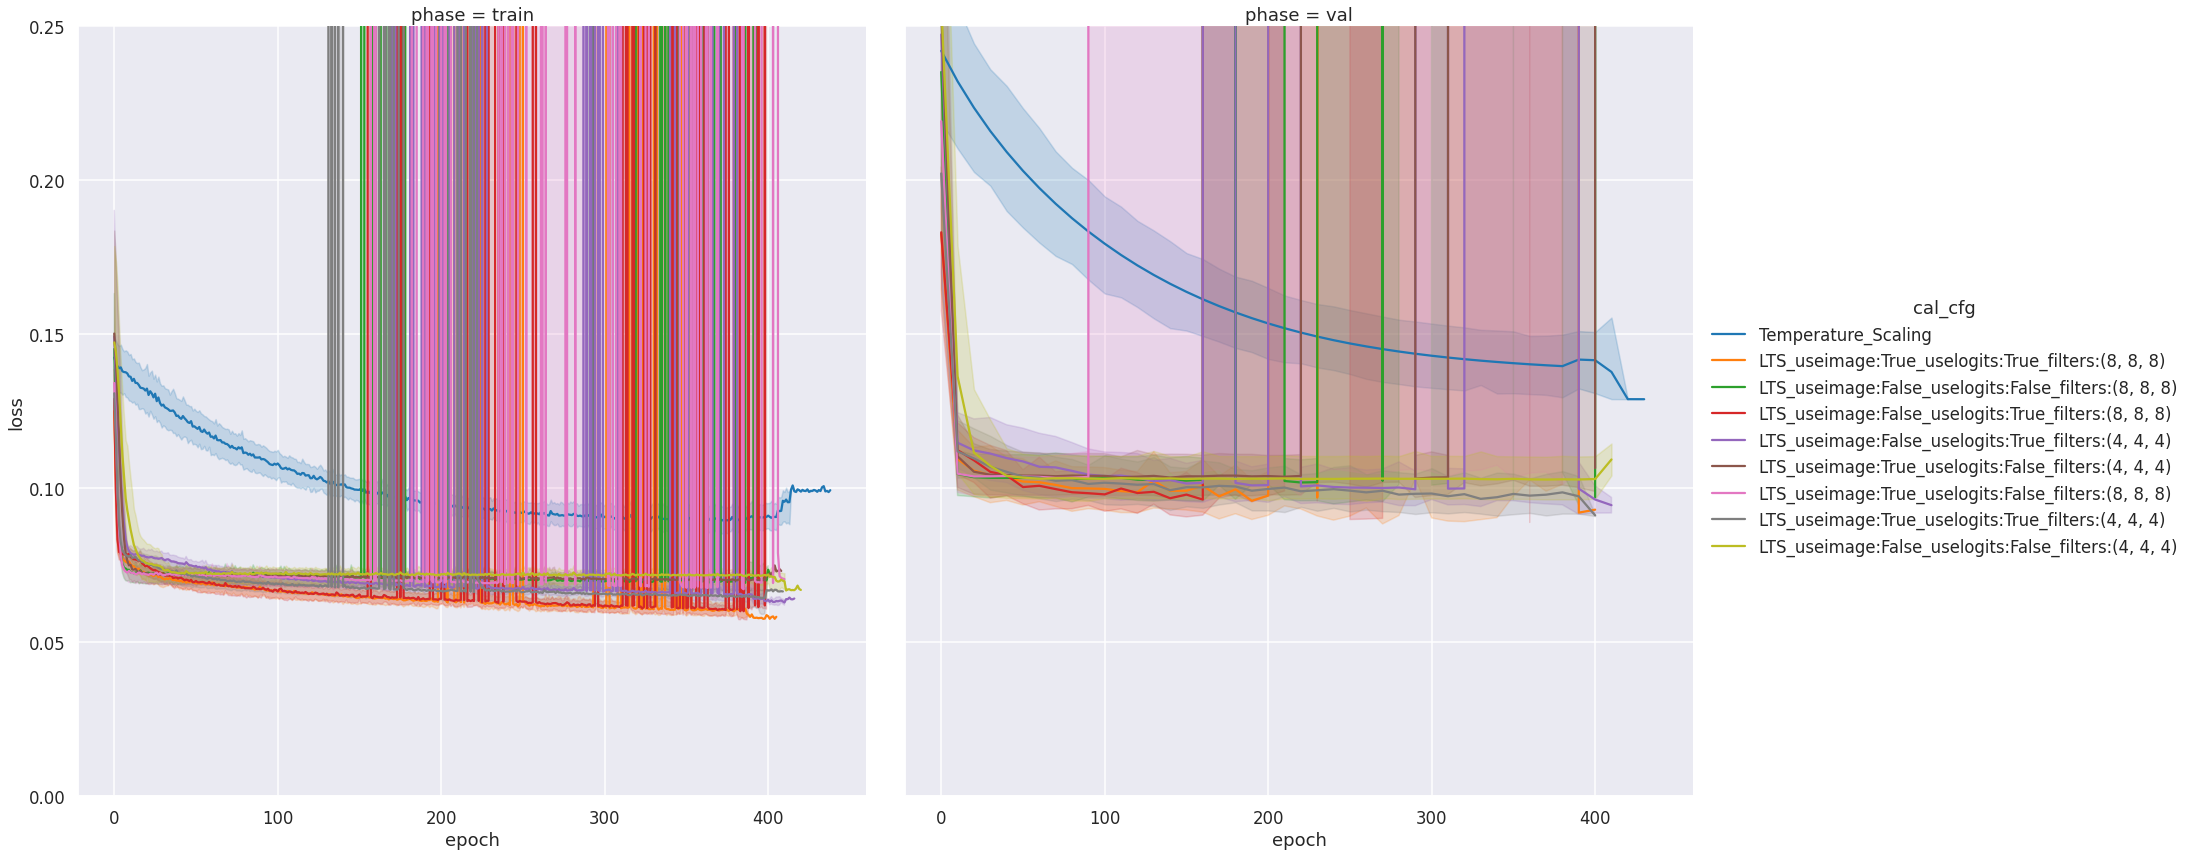

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    col='phase',
    hue='cal_cfg',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0.0, 0.25))

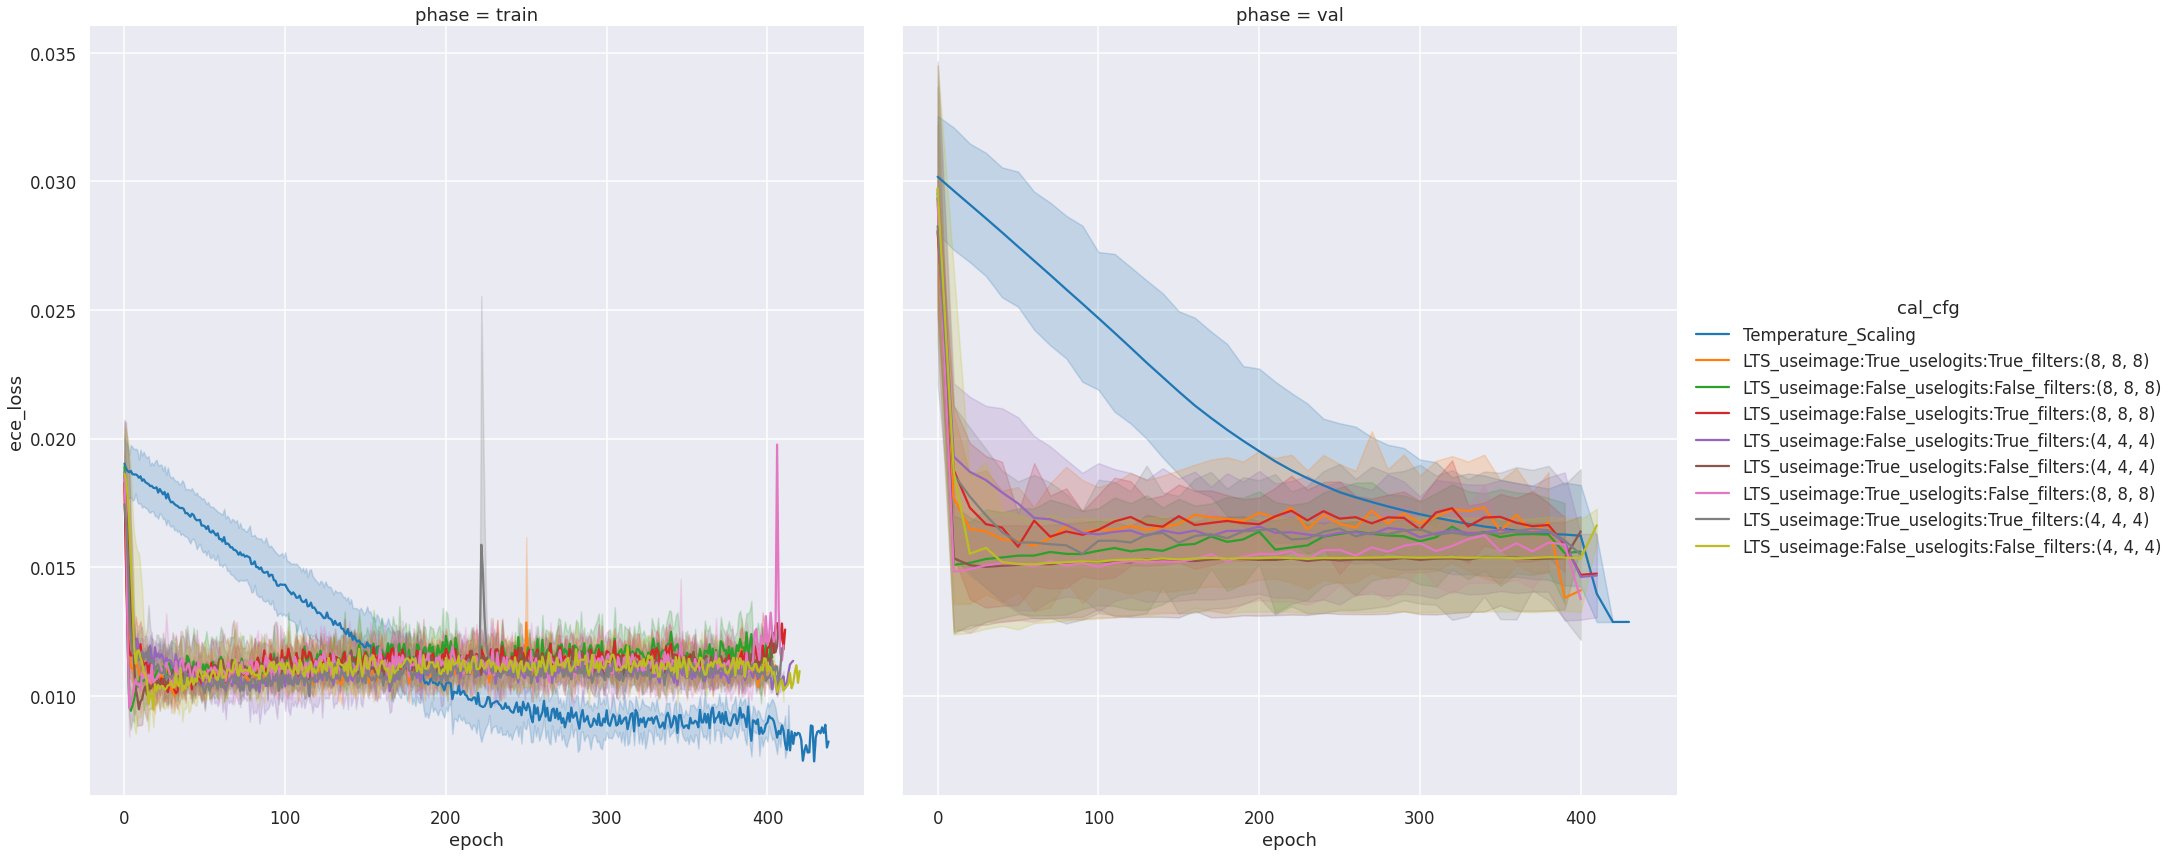

In [9]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    col='phase',
    hue='cal_cfg',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))